<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/Diracturing/Lab_6/Diracturing_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential equations**
**Julius Andersson**

# **Abstract**
The theme for this lab was differential equations. The task is to solve scalar and system of inital value problem. This was achieved with the Euler explicit method. Tests was performed to see the accuracy and stability of some model problems.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [2]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [3]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
To be able to solve differential equations is an important task in science. Many solutions can not be done with analytic methods and therefore computational methods is often instead used. In this lab a simpel method named eulers explicit method was used. We have the problem $\frac{du}{dt}=f(u,t)$ and $u(0)=u_0$. Where $u$ can be both a scalar and a vector function, $u: [0,T]->R^N$. Eulers explicit method is as follows: $u(t_n)\approx u(t_{n-1})+k_nf(u(t_{n-1}),t_{n-1})$.

# **Method**
The algorithm is taken from algorithm 13.1 in the lecture notes. It is the explicit euler method. (It is the same for scalar and system but I choose to divide them into two)

In [11]:
def explEuler(f,u0,T,k):
  u_t=[]
  t=0
  while t<T:
    u=u0+k*f(u0,t)
    u_t.append(u)
    u0=u
    t=t+k
  return u_t





In [13]:
def SystemExplEuler(f,u0,T,k):
  u_t=[]
  t=0
  while t<T:
    u=u0+k*f(u0,t)
    u_t.append(u)
    u0=u
    t=t+k
  return u_t




# **Results**

1) The model problem we choose is $\frac{du(t)}{dt}=-u(t)$ with $u(0)=u_0$. It has the solution $u(t)=u_0e^{-t}$. It has a stable equlibrium at $u^*=0$ (see lecture notes p.283). Here we test $u_0=-1,1,-10,10$.

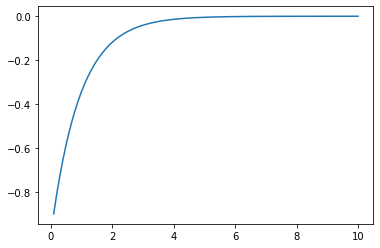

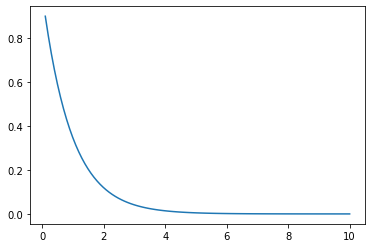

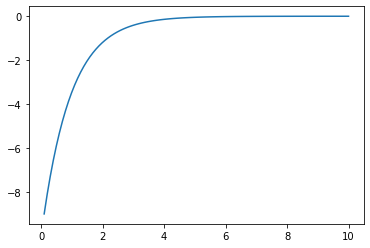

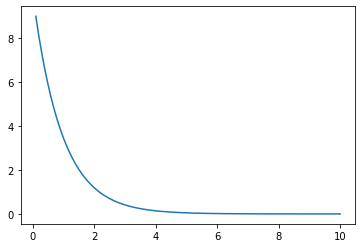

In [6]:
f=lambda u,t: -u

ut=explEuler(f,-1,10,1/10)
t=np.linspace(1/10,10,101)
plt.plot(t,ut)
plt.show()

ut=explEuler(f,1,10,1/10)
t=np.linspace(1/10,10,101)
plt.plot(t,ut)
plt.show()

ut=explEuler(f,-10,10,1/10)
t=np.linspace(1/10,10,101)
plt.plot(t,ut)
plt.show()


ut=explEuler(f,10,10,1/10)
t=np.linspace(1/10,10,101)
plt.plot(t,ut)
plt.show()


From the above results we see all approaching zero. This suggests it to be stable. Now we test the accuracy by setting $u_0=1$ and test the approximation against the analytic solution.

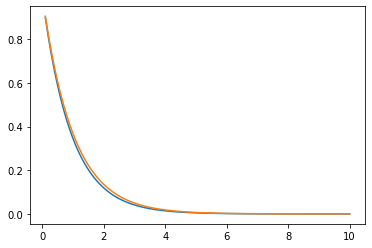

In [7]:
f=lambda u,t: -u

ut=explEuler(f,1,10,1/10)
t=np.linspace(1/10,10,101)
plt.plot(t,ut)

y=[ 1*np.exp(-i) for i in t]
plt.plot(t,y)
plt.show()

Here we see both the solution and the approximation by our explicit Euler method.

2) Here we choose the model problem as $u_1'=u_2, u_2'=u_1$. This can be represented in vector notation as $A=((0,1),(1,0))$. It has equilibrium point at $u^*=0$. The matrix has eigenvalue $\lambda_1=1, \lambda_2=-1$. It should therefore not be stable. Below we test the stability and uses $u_0=(0.1,0),(-0.1,0)$ and lastly $(0,0)$. The graph only plot $(u_1,u_2)$ without time.

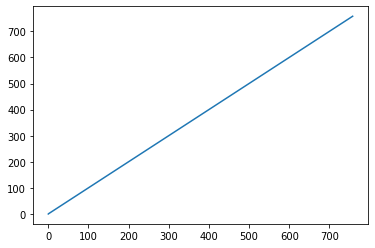

[array([0.1 , 0.01]), array([0.101, 0.02 ]), array([0.103 , 0.0301]), array([0.10601, 0.0404 ]), array([0.11005 , 0.051001]), array([0.1151501, 0.062006 ]), array([0.1213507 , 0.07352101]), array([0.1287028 , 0.08565608]), array([0.13726841, 0.09852636]), array([0.14712105, 0.1122532 ]), array([0.15834637, 0.12696531]), array([0.1710429 , 0.14279994]), array([0.18532289, 0.15990423]), array([0.20131331, 0.17843652]), array([0.21915697, 0.19856785]), array([0.23901375, 0.22048355]), array([0.26106211, 0.24438492]), array([0.2855006 , 0.27049113]), array([0.31254971, 0.29904119]), array([0.34245383, 0.33029616]), array([0.37548345, 0.36454155]), array([0.4119376 , 0.40208989]), array([0.45214659, 0.44328365]), array([0.49647496, 0.48849831]), array([0.54532479, 0.53814581]), array([0.59913937, 0.59267829]), array([0.6584072 , 0.65259222]), array([0.72366642, 0.71843294]), array([0.79550971, 0.79079958]), array([0.87458967, 0.87035056]), array([0.96162473, 0.95780952]), array([1.05740568,

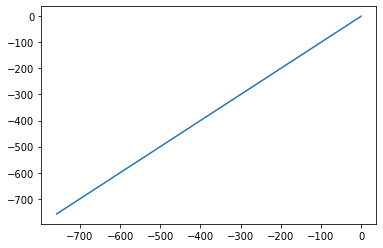

[array([-0.1 , -0.01]), array([-0.101, -0.02 ]), array([-0.103 , -0.0301]), array([-0.10601, -0.0404 ]), array([-0.11005 , -0.051001]), array([-0.1151501, -0.062006 ]), array([-0.1213507 , -0.07352101]), array([-0.1287028 , -0.08565608]), array([-0.13726841, -0.09852636]), array([-0.14712105, -0.1122532 ]), array([-0.15834637, -0.12696531]), array([-0.1710429 , -0.14279994]), array([-0.18532289, -0.15990423]), array([-0.20131331, -0.17843652]), array([-0.21915697, -0.19856785]), array([-0.23901375, -0.22048355]), array([-0.26106211, -0.24438492]), array([-0.2855006 , -0.27049113]), array([-0.31254971, -0.29904119]), array([-0.34245383, -0.33029616]), array([-0.37548345, -0.36454155]), array([-0.4119376 , -0.40208989]), array([-0.45214659, -0.44328365]), array([-0.49647496, -0.48849831]), array([-0.54532479, -0.53814581]), array([-0.59913937, -0.59267829]), array([-0.6584072 , -0.65259222]), array([-0.72366642, -0.71843294]), array([-0.79550971, -0.79079958]), array([-0.87458967, -0.870

In [9]:
f=lambda u,t: np.array([u[1],u[0]])
arr=SystemExplEuler(f,np.array([0.1,0]),10,1/10)
#print(arr)
x=[]
y=[]
for i in arr:
  x.append(i[0])
  y.append(i[1])

plt.plot(x,y)
plt.show()
print(arr)

f=lambda u,t: np.array([u[1],u[0]])
arr=SystemExplEuler(f,np.array([-0.1,0]),10,1/10)
#print(arr)
x=[]
y=[]
for i in arr:
  x.append(i[0])
  y.append(i[1])


plt.plot(x,y)
plt.show()
print(arr)

print()
print()
print("Data for u0=(0,0)")
f=lambda u,t: np.array([u[1],u[0]])
arr=SystemExplEuler(f,np.array([0,0]),10,1/10)
#print(arr)
x=[]
y=[]
for i in arr:
  x.append(i[0])
  y.append(i[1])

print(arr)

We see therefore it is not stable. Lets look at the accuracy. For $u_0=(-1,1)$ the solution is $u_1(t) =-e^{-t}, u_2(t)=e^{-t}$ (according to www.wolframalpha.com). 

In [10]:
f=lambda u,t: np.array([u[1],u[0]])
arr=SystemExplEuler(f,np.array([-1,1]),10,1/10)
t=np.linspace(1/10,10,101)



g=lambda t:np.array([-np.exp(-t),np.exp(-t)])
sol=[g(i) for i in t]


x=[]
y=[]

for i in arr:
  x.append(i)
for i in sol:
  y.append(i)

err=[]
for i in range(len(arr)):
  err.append(np.linalg.norm(x[i]-y[i]))

print(err)



[0.006841142193322138, 0.013505588670639715, 0.018810935069034675, 0.022958379221616105, 0.02612284532457854, 0.028456191346468405, 0.030090041023000273, 0.03113828313224444, 0.0316992759897823, 0.03185779086951252, 0.031686724286727294, 0.031248605725490312, 0.030596924407236693, 0.029777296041726267, 0.02882848813918353, 0.02778332036166719, 0.026669454523894767, 0.025510087193452588, 0.024324556364836956, 0.02312887237084899, 0.021936182030444878, 0.0207571739981196, 0.019600432361923163, 0.018472744722475915, 0.01737937026246276, 0.016324272674876746, 0.015310322249706444, 0.014339470914746216, 0.013412903579572652, 0.012531168736083858, 0.011694290918637275, 0.010901867316686732, 0.010153150558391742, 0.009447119440944776, 0.008782539168757873, 0.008158012470998798, 0.007572022802440988, 0.007022970683680734, 0.006509204106250588, 0.006029043813032649, 0.005580804162892143, 0.005162810199042007, 0.004773411461927386, 0.00441099301814869, 0.004073984116031719, 0.0037608648249301572

Above is the error for each time step of the approximation shown. We can see that the accuracy is good with not too many time steps. 

# **Discussion**
All the tests did follow the predicted values from the theory. Because many model problems are not easy to solve analytical it took some work to try find simple model problems where analytical solutions exist. When dealing with the scalar inital value problem it is easier to show the results by plots. In the case of system of initial value problem I was not sure how to present it (suggestions are welcome).  

# **APPENDIX**